In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Label Encoding

In [4]:
lb = LabelEncoder() 

In [5]:
df["Gender"] = lb.fit_transform(df["Gender"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

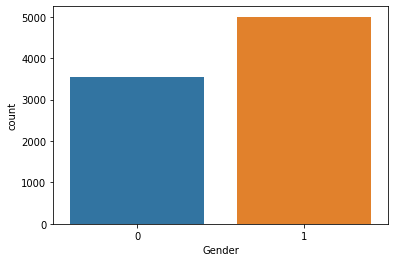

In [6]:
sns.countplot(x = "Gender", data = df)

In [7]:
print("Maximum = ", df.Height.max())
print("Minimum = ", df.Height.min())

Maximum =  80.45
Minimum =  54.61685783


In [8]:
len(df[df.Height == df.Height.max()])

1

<AxesSubplot:xlabel='Height', ylabel='Count'>

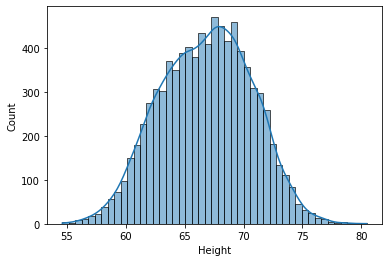

In [9]:
sns.histplot(x = "Height", data = df, kde = True)

In [10]:
mean = df.Height.mean()
mean

66.80992512908942

In [11]:
std = df.Height.std()
std

3.8514544315772743

In [12]:
std_3_plus = mean + (3 * std) 
std_3_plus

78.36428842382125

In [13]:
std_3_minus = mean - (3 * std)
std_3_minus

55.2555618343576

In [14]:
df_ppsitive = df[df.Height > std_3_plus]
df_ppsitive

,Gender,Height,Weight
1317,1,78.462053,227.342565
2014,1,78.998742,269.989698
3285,1,78.528210,253.889004
3757,1,78.621374,245.733783
6328,0,80.450000,178.020675


In [15]:
df_negetive = df[df.Height < std_3_minus]
df_negetive

,Gender,Height,Weight
6624,0,54.616858,71.393749
7294,0,54.873728,78.606670
7617,0,55.148557,88.812412


In [16]:
outliers = [df_ppsitive, df_negetive]

In [17]:
df_outliers = pd.concat(outliers)
df_outliers

,Gender,Height,Weight
1317,1,78.462053,227.342565
2014,1,78.998742,269.989698
3285,1,78.528210,253.889004
3757,1,78.621374,245.733783
6328,0,80.450000,178.020675
6624,0,54.616858,71.393749
7294,0,54.873728,78.606670
7617,0,55.148557,88.812412


In [18]:
df.shape

(8555, 3)

# Remove the Outliers

In [19]:
outliers = df[(df.Height < std_3_plus) & (df.Height > std_3_minus)]

In [20]:
df = outliers.copy()

In [21]:
df.shape

(8547, 3)

<AxesSubplot:xlabel='Height', ylabel='Count'>

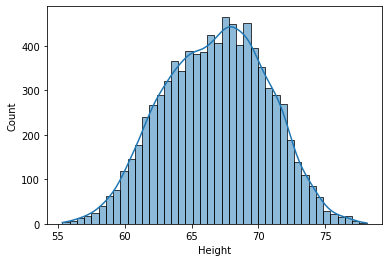

In [22]:
sns.histplot(x = "Height", data = df, kde = True)

# Spliting the dataset into X and Y

In [23]:
x = df.drop("Weight", axis = 1)
y = df["Weight"]

In [24]:
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [25]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8547, dtype: float64

# Spliting the x and y into train test dataset

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.75, random_state= 0)

In [27]:
x_train

,Gender,Height
2589,1,70.441767
5024,0,66.103873
5017,0,62.257430
5975,0,60.257493
1086,1,71.507242
...,...,...
4377,1,63.121927
7899,0,60.141442
4863,1,68.474585
3266,1,73.358383


In [28]:
y_train

2589    194.901770
5024    148.645183
5017    115.797393
5975    110.101140
1086    202.518458
           ...    
4377    153.944731
7899    110.837855
4863    183.375134
3266    212.256253
2734    198.404177
Name: Weight, Length: 6410, dtype: float64

# Linear Regression

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(x_test)

In [32]:
y_pred

array([154.58595958, 187.54240271, 171.65774957, ..., 145.88638027,
       147.85986809, 167.46642996])

# Model Score

In [33]:
score = r2_score(y_test, y_pred)

In [34]:
score

0.90168710545605

# Prediction via user input

In [35]:
a = int(input("Enter the Gender (1 - male, 0 - female) : "))
b = float(input("Enter Height : "))
output = regressor.predict([[a, b]])
output

Enter the Gender (1 - male, 0 - female) : 1
Enter Height : 56.33


array([110.69752278])